
<br><h2>Windows or Mac | Daniel Torres</h2>
<h4> Machine Learning | Unsupervised Learning</h4>


***
***

<h3>Part I: Introduction and Preparation</h3><br>

<strong>Context</strong><br>

The exploitation of psychological traits to increase marketing effectiveness and returns is well
established, with the major pillar being that customers tend to prefer brands that represent human
characteristics which are like theirs (Aaker, 1997). However, the accessibility of relevant and reliable data
has historically been a major caveat in conceptualizing approaches to target certain customer segments
(Myers, Sen, & Alexandrov, 2010).
Thanks to the exceptional effort of our researchers, a representative data sample has been sourced,
based on the well-known Big 5 Personality Traits by Robert McCrae and Paul Costa.

<strong>A Note on the Dataset</strong><br>

The dataset in this script represents the survey results of the personality traits of 147 customers that are currently using a MacBook or a Windows laptop.

The survey ratings are on the scale of 1-5, where
1=disagree, 2=slightly disagree, 3=neutral, 4=slightly agree and 5=agree

The demographic information related to such customers is as follows:<br><br>
<u>Current Laptop</u><br>
1. MacBook
2. Windows Laptop

<br>
<u>Next Laptop</u><br>

1. MacBook
2. Windows Laptop
3. Chromebook

<br>
<u>Program</u><br>

1. DD (MIB & Business Analytics)
2. One year Business Analytics
3. DD (MBA & Business Analytics)
4. DD (MBA & Disruptive innovation)

<br>
<u>Gender</u><br>

1. Male
2. Female

<br>Below mentioned are other demographics: <br><br>
<u>Age Group</u>   : 21 to 49<br>
<u>Nationality</u> : 68 Nationalities<br>
<u>Ethnicity</u>   : 7 Ethinicities (while few prefer not to answer)<br>

<br><br>
<strong>Importing packages & Data</strong><br>

Importing necessary packages, loading data, and setting display options. 

In [2]:
########################################
# importing packages
########################################
import pandas                as pd                      # data science essentials
import matplotlib.pyplot     as plt                     # fundamental data visualization
import seaborn               as sns                     # enhanced visualizations
import numpy                 as np                      # scientific computing 
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [3]:
# setting print options

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [4]:
file= 'survey_data.xlsx'
df= pd.read_excel(file)

<br><br>
<strong>Looking for null values and column type </strong><br>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 58 columns):
surveyID                                                                    147 non-null object
Am the life of the party                                                    147 non-null int64
Feel little concern for others                                              147 non-null int64
Am always prepared                                                          147 non-null int64
Get stressed out easily                                                     147 non-null int64
Have a rich vocabulary                                                      147 non-null int64
Don't talk a lot                                                            147 non-null int64
Am interested in people                                                     147 non-null int64
Leave my belongings around                                                  147 non-null int64
Am relaxed most of the time            

***
***

<strong>User-Defined Functions</strong><br>

Creating user-defined functions to generate plots 


In [6]:
########################################
# inertia
########################################
def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

***
***

<h3>Part II: Feature Engineering</h3><br>

On reviewing the outputs above, I identified that the dataset contains demographic data and personality psychometrics (Big 5 personality traits).
<br>
After understanding the data, I am conducting feature engineering to be able to analyze the dataset.<br>

<br><strong>A- Dropping columns of demographics:</strong><br>

Demographic data is extremely different from personality psychometrics, and their concatenation would bias the results of an analysis. So as a best practice, the demographic data is removed before building an algorithm.
<br>
    <br>1) What laptop do you currently have?
    <br>2) What laptop would you buy in next assuming if all laptops cost the same?
    <br>3) What program are you in?
    <br>4) What is your age?
    <br>5) Gender
    <br>6) What is your nationality? 
    <br>7) What is your ethnicity?
    


In [7]:
# Creating a list with the variables that are not numerical including the survey ID

drop_list=["surveyID",
           "What laptop do you currently have?",
           "What laptop would you buy in next assuming if all laptops cost the same?",
           "What program are you in?",
           "What is your age?",
           "Gender",
           "What is your nationality? ",
           "What is your ethnicity?"
          ]

In [8]:
# Dropping the variables that are not numerical

df_2=df.drop(drop_list, axis=1)

<br><strong>B- Converting negative ratings into positive ratings:</strong><br>

Few traits were noted which were negative in nature. So in order to be able to compare them we are converting such negative ratings into positive ratings. For example if any customer has rated 5 for a negative trait that shall become a 1 as a positive trait.

For instance, a customer that agrees that they don't talk a lot converts into disagrees that they talk a lot.
<br><br>

Ratings for the below mentioned negative traits have been converted to positive ratings, however the column names have not been changed:
<br>
    <br>1)   Feel little concern for others
    <br>2)   Get stressed out easily
    <br>3)   Don't talk a lot
    <br>4)   Leave my belongings around
    <br>5)   Have difficulty understanding abstract ideas
    <br>6)   Insult people
    <br>7)   Worry about things
    <br>8)   Keep in the background
    <br>9)   Make a mess of things
    <br>10)  Am not interested in abstract ideas
    <br>11)  Am not interested in other people's problems
    <br>12)  Am easily disturbed
    <br>13)  Have little to say
    <br>14)  Often forget to put things back in their proper place
    <br>15)  Get upset easily
    <br>16)  Do not have a good imagination
    <br>17)  Am not really interested in others
    <br>18)  Change my mood a lot
    <br>19)  Don't like to draw attention to myself
    <br>20)  Have frequent mood swings
    <br>21)  Get irritated easily
    <br>22)  Am quiet around strangers
    <br>23)  Often feel blue

In [9]:
# Creating a list with the variables that need a scale change

inverse_list=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,28,29,31,33,35,37,38,43,45,48]

In [10]:
# Looping to change the scale of the columns of the inverse_list

for column in inverse_list:
    a=0
    for i in df_2.iloc[: , column]:
        df_2.iloc[a, column]=(6-i)
        a+=1

<br><strong>C- Grouping relevant columns for Big 5 Personality Traits:</strong><br>

The Big Five factors and their constituent traits can be summarized as an acronym of “OCEAN”, but in the dataset, the order is the following:
<br>
    <br>1)   Extraversion – (outgoing/energetic vs. solitary/reserved)
    <br>2)   Agreeableness – (friendly/compassionate vs. cold/unkind)
    <br>3)   Conscientiousness – (efficient/organized vs. easy-going/careless)
    <br>4)   Neuroticism – (sensitive/nervous vs. secure/confident)
    <br>5)   Openness to experience – (inventive/curious vs. consistent/cautious)
<br><br>
We noted a pattern in the dataset for grouping columns into the above mentioned categories.
In order to have better results, we are using average rating of the respective columns.


In [11]:
# Creating new columns for the Big 5 Personality Traits

# Extroversion

list_group=[]
for i in range(0,50,5):
    list_group.append(i)

df_2['Extroversion']=  round(np.mean(df_2.iloc[:, list_group], axis=1),2)



# Agreeableness

list_group=[]
for i in range(1,50,5):
    list_group.append(i)

df_2['Agreeableness']=  round(np.mean(df_2.iloc[:, list_group], axis=1),2)



# Conscientiousness

list_group=[]
for i in range(2,50,5):
    list_group.append(i)

df_2['Conscientiousness']=  round(np.mean(df_2.iloc[:, list_group], axis=1),2)



# Neuroticism

list_group=[]
for i in range(3,50,5):
    list_group.append(i)

df_2['Neuroticism']=  round(np.mean(df_2.iloc[:, list_group], axis=1),2)


# Openness

list_group=[]
for i in range(4,50,5):
    list_group.append(i)

df_2['Openness']=  round(np.mean(df_2.iloc[:, list_group], axis=1),2)

<br><strong>D- Scaling of Data:</strong><br>

Explanatory variables should be scaled before developing a principal component analysis algorithm.
<br>


In [12]:
# creating a new data frames to do the factor loading

df_3_big5=df_2.iloc[:,50:55]

In [13]:
# Scaling the Big 5 personalities
scaler = StandardScaler()

# Checking pre and post scaling
scaler.fit(df_3_big5)
X_big5_scaled = scaler.fit_transform(df_3_big5)
df_3_big5_scaled = pd.DataFrame(X_big5_scaled)
df_3_big5_scaled.columns = df_3_big5.columns

print(pd.np.var(df_3_big5), '\n')
print(pd.np.var(df_3_big5_scaled))

Extroversion         0.425488
Agreeableness        0.321486
Conscientiousness    0.307301
Neuroticism          0.470110
Openness             0.275283
dtype: float64 

Extroversion         1.0
Agreeableness        1.0
Conscientiousness    1.0
Neuroticism          1.0
Openness             1.0
dtype: float64


***
***

<h3>Part III: Principal Component Analysis (PCA)</h3><br>

Our process here is to:
1. Develop a PCA model with no limit to principal components
2. Analyze the <strong>variances</strong> and the <strong>scree plot</strong>
3. Decide how many components to RETAIN
4. Build a new model with a limited number of principal components
5. Interpret the results (what does each PC represent)



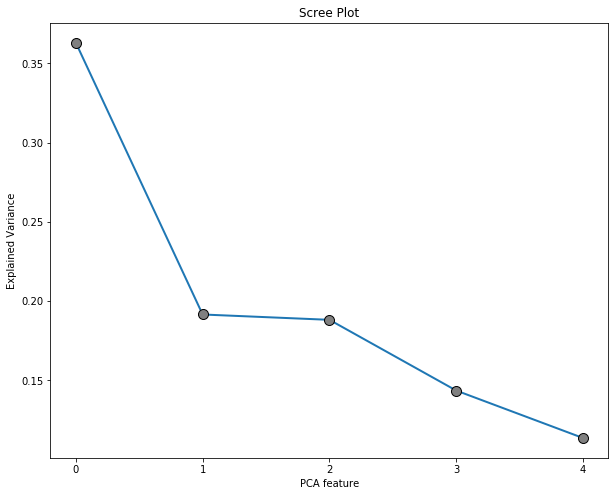

,0,1,2,3,4
Extroversion,-0.339833,0.537239,-0.685735,0.016552,-0.354093
Agreeableness,-0.511531,0.171252,0.208428,0.721475,0.380841
Conscientiousness,-0.522840,-0.330224,0.360116,-0.027928,-0.697945
Neuroticism,-0.301580,-0.719566,-0.559080,-0.028815,0.279058
Openness,-0.508466,0.234999,0.209931,-0.691078,0.405681


In [14]:
# Instantiating PCA object for Big 5

pca_1 = PCA(n_components = None,
          random_state=222)


# Fitting and Transforming the scaled data
pca_1_fit = pca_1.fit_transform(df_3_big5_scaled)

 
# Calling the scree_plot function
scree_plot(pca_object = pca_1)


# Creating dataframe for factors

factors_1 = pd.DataFrame(pd.np.transpose(pca_1.components_))
factors_1 = factors_1.set_index(df_3_big5_scaled.columns)

factors_1

In [15]:
# Factors loading of BIG 5

factor_loadings_1 = pd.DataFrame(pd.np.transpose(pca_1.components_))


# naming rows as original features
factor_loadings_1 = factor_loadings_1.set_index(df_3_big5_scaled.columns)

factor_loadings_1.to_excel('factors_Big5.xlsx')

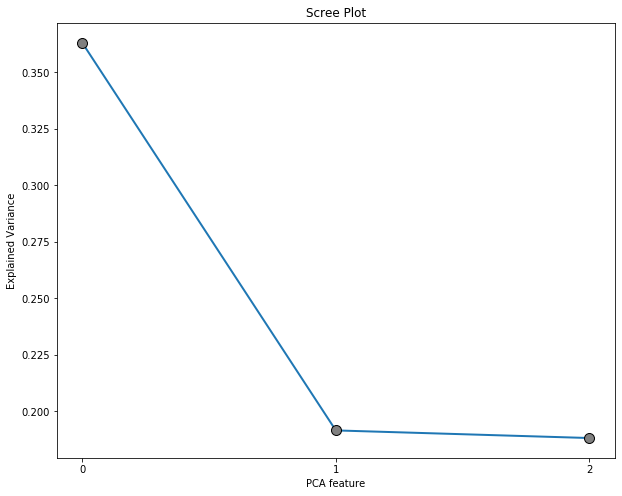

,Couch_potatos,Party_animals,Lone_wolves
Extroversion,-0.339833,0.537239,-0.685735
Agreeableness,-0.511531,0.171252,0.208428
Conscientiousness,-0.522840,-0.330224,0.360116
Neuroticism,-0.301580,-0.719566,-0.559080
Openness,-0.508466,0.234999,0.209931


In [25]:
# Instantiating new model to capture at least 70% of the variance - BIG 5
pca_1 = PCA(0.70,
            random_state = 222)

 
# Fitting and Transforming the scaled data
pca_fit = pca_1.fit_transform(df_3_big5_scaled)

 
# Calling the scree-plot function
scree_plot(pca_object=pca_1)


# Analyzing factor strengths per client
X_pca = pca_1.transform(df_3_big5_scaled)

 
# Converting into DataFrame
X_pca_df = pd.DataFrame(X_pca)


# Creating dataframe for factors
factors_2 = pd.DataFrame(pd.np.transpose(pca_1.components_))
factors_2 = factors_2.set_index(df_3_big5_scaled.columns)


# Giving names to the remaining groups
factors_2.columns=['Couch_potatos', 'Party_animals', 'Lone_wolves']
X_pca_df.columns=['Couch_potatos', 'Party_animals', 'Lone_wolves']
factors_2

In [26]:
# Checking the results 

X_pca_df.head(10)


,Couch_potatos,Party_animals,Lone_wolves
0,-0.025988,-0.221107,0.133741
1,0.271296,-0.320236,0.919580
2,0.630724,-1.498449,-1.660751
3,0.150387,0.540674,0.403534
4,1.699904,0.501627,-0.311654
5,1.984025,1.034685,0.947709
6,1.206794,0.975333,0.667232
7,3.171151,-0.468405,-2.174911
8,-1.300187,-0.305141,-1.277151
9,0.907342,-0.873461,0.104600


Couch_potatos    1.0
Party_animals    1.0
Lone_wolves      1.0
dtype: float64


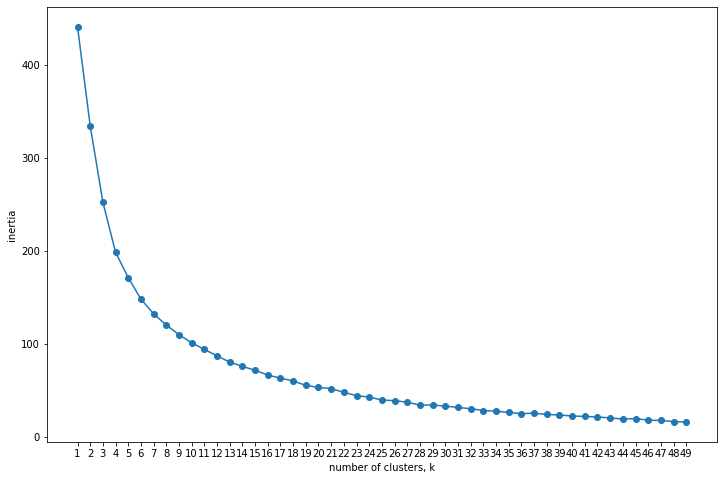

In [27]:
# Instantiating standarscaler object - BIG 5
scaler = StandardScaler()

 
# Fitting the scaller
scaler.fit(X_pca_df)

# Transforming the fitted data
X_scaled_2 = scaler.transform(X_pca_df)

# Converting into DataFrame
X_scaled_df_1 = pd.DataFrame(X_scaled_2)

# Reattaching column names
X_scaled_df_1.columns = X_pca_df.columns

# Checking post-scaling variance
print(pd.np.var(X_scaled_df_1))

inertia_plot(data = X_scaled_df_1)


***
***
<br>
<h3>Part IV: k-Means Clustering</h3><br>

Since we did the PCA, we are going to create clusters with the k-means clustering method. This is a more robust way to create clusters and is also a technique that can be used to predict on new data.

In [28]:
# Instantiating a KMeans object, BIG 5

kmean_1 = KMeans(n_clusters = 4,
               random_state=222)
 
# Fitting the object into data
kmean_1.fit(X_scaled_df_1)

 
# Converting clusters into DataFrame
kmean_df_1 = pd.DataFrame({'Cluster': kmean_1.labels_})

# Checking the results
print(kmean_df_1.iloc[:,0].value_counts())

2    49
1    38
0    32
3    28
Name: Cluster, dtype: int64



<br>
We shall now use <strong>centriods</strong> (i.e. variable averages) to help interpret each cluster. This will help us to understand the characteristics of each potential segment in our data.

In [29]:
# Storing cluster centers BIG 5
centroids_pca_1 = kmean_1.cluster_centers_


# Converting cluster centers into DataFrame
centroids_pca_df_1 = pd.DataFrame(centroids_pca_1)
centroids_pca_df_1

# renaming principal components
centroids_pca_df_1.columns = ['Couch_potatos', 'Party_animals', 'Lone_wolves']

 
# Checking results
centroids_pca_df_1.round(2)

,Couch_potatos,Party_animals,Lone_wolves
0,0.99,-0.36,-0.84
1,-0.02,-0.84,0.90
2,-0.95,0.21,-0.57
3,0.56,1.19,0.74


In [30]:
# Concatinating cluster with principal components

df_4 = pd.concat([kmean_df_1,
                  X_pca_df],
                 axis = 1)

In [31]:
df_4.head(10)

,Cluster,Couch_potatos,Party_animals,Lone_wolves
0,1,-0.025988,-0.221107,0.133741
1,1,0.271296,-0.320236,0.919580
2,0,0.630724,-1.498449,-1.660751
3,3,0.150387,0.540674,0.403534
4,0,1.699904,0.501627,-0.311654
5,3,1.984025,1.034685,0.947709
6,3,1.206794,0.975333,0.667232
7,0,3.171151,-0.468405,-2.174911
8,2,-1.300187,-0.305141,-1.277151
9,1,0.907342,-0.873461,0.104600


In [32]:
# Concatinating demographic information with pca-clusters
final_df = pd.concat([df.loc[:, drop_list],
                     df_4],
                    axis = 1)

final_df.head()

,surveyID,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,Cluster,Couch_potatos,Party_animals,Lone_wolves
0,a1000,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,1,-0.025988,-0.221107,0.133741
1,a1001,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,1,0.271296,-0.320236,0.919580
2,a1002,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,0,0.630724,-1.498449,-1.660751
3,a1003,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,3,0.150387,0.540674,0.403534
4,a1004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,0,1.699904,0.501627,-0.311654


***
***
<br>
<h3>Part V: Analyze with Demographics</h3><br>
Now that we've completed all of our preparation, we shall analyze our results with demographics and other data.<br>

<function matplotlib.pyplot.show(*args, **kw)>

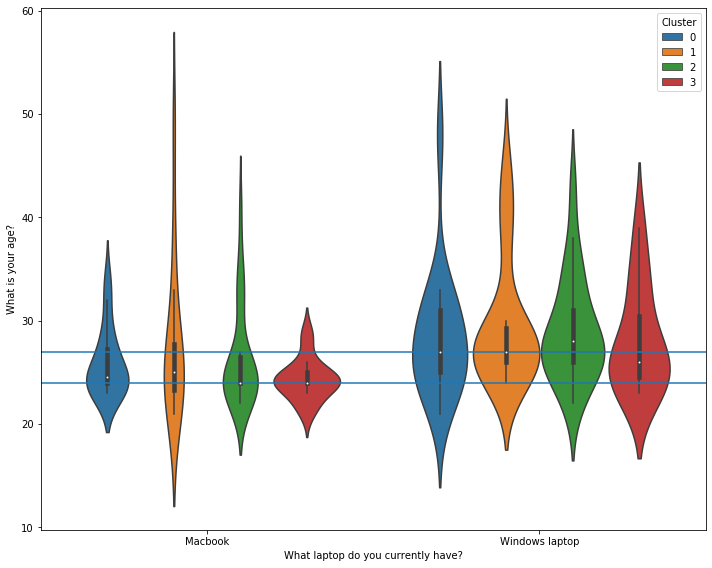

In [47]:
## AGE vs CLUSTERS

fig,ax = plt.subplots(figsize = (10,8))
graph1=sns.violinplot(x='What laptop do you currently have?',
               y= final_df.iloc[:,4],
               hue=final_df.iloc[:,8],
               data = final_df)

graph1.axhline(24)
graph1.axhline(27)
plt.tight_layout()
plt.show

In the previous graph, it can be seen that the majority of people currently own a Windows laptop. Additionally, in the case of Macbook owners, the widest part of the violinplot is in a lower age range, it means that within the people of the study, the youngest prefer a Macbook laptop instead of Microsoft.

***


<function matplotlib.pyplot.show(*args, **kw)>

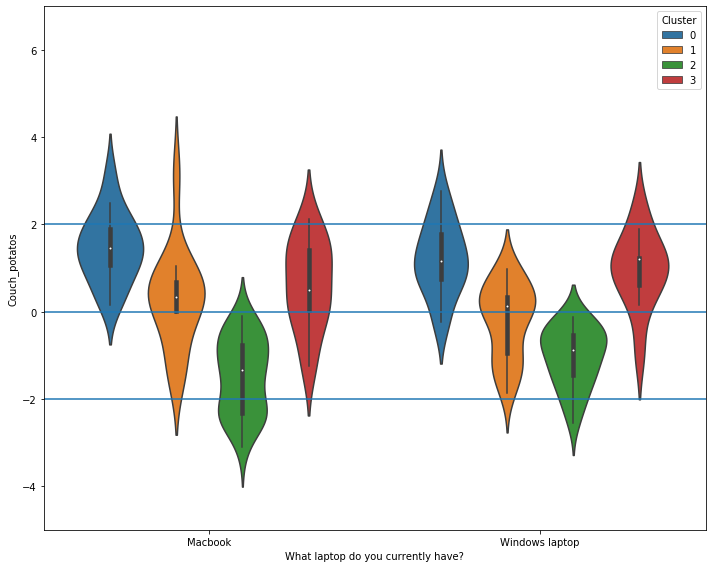

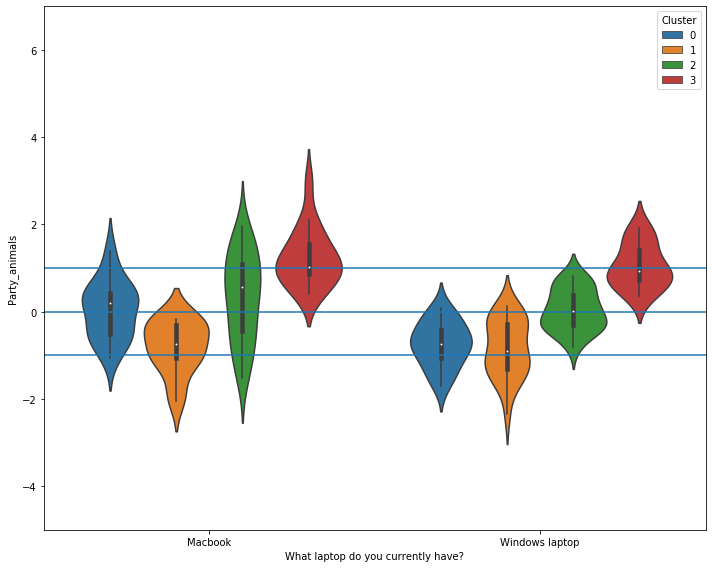

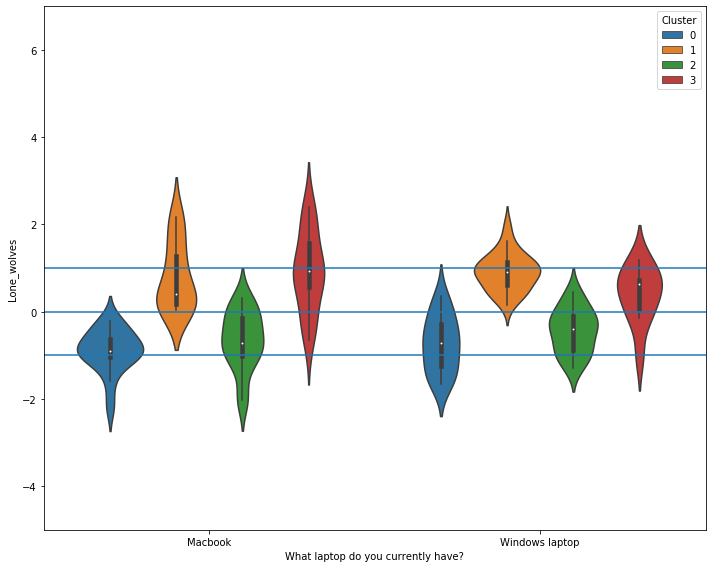

In [42]:
## CURRENT LAPTOP BRAND vs CLUSTERS

# Couch Potato
fig,ax = plt.subplots(figsize = (10,8))
graph1=sns.violinplot(x='What laptop do you currently have?',
               y= final_df.iloc[:,9],
               hue=final_df.iloc[:,8],
               data = final_df)

graph1.axhline(0)
graph1.axhline(2)
graph1.axhline(-2)
plt.ylim(-5,7)                   
plt.tight_layout()
plt.show

# Party Animal
fig,ax = plt.subplots(figsize = (10,8))
graph2=sns.violinplot(x='What laptop do you currently have?',
               y= final_df.iloc[:,10],
               hue=final_df.iloc[:,8],
               data = final_df)

graph2.axhline(0)
graph2.axhline(1)
graph2.axhline(-1)
plt.ylim(-5,7)                   
plt.tight_layout()
plt.show


# Lone wolf
fig,ax = plt.subplots(figsize = (10,8))
graph3=sns.violinplot(x='What laptop do you currently have?',
               y= final_df.iloc[:,11],
               hue=final_df.iloc[:,8],
               data = final_df)

graph3.axhline(0)
graph3.axhline(1)
graph3.axhline(-1)
plt.ylim(-5,7)                   
plt.tight_layout()
plt.show

Within cluster 0, the people whose characteristics are positive correlated with the party_animals group, tend to prefer Macbook and the ones who are negative correlated with the party_animals group prefer a Windows laptop. In the other groups: Couch_potatoes and Lone_wolfs there is not a clear difference between clusters. 

<function matplotlib.pyplot.show(*args, **kw)>

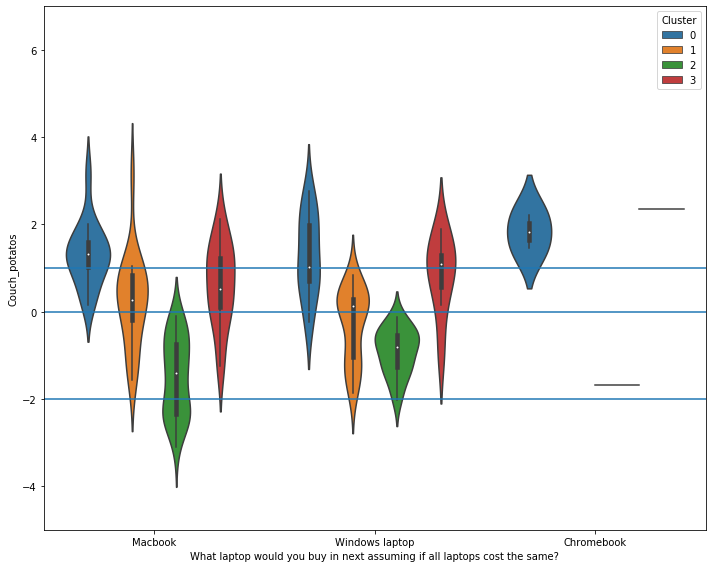

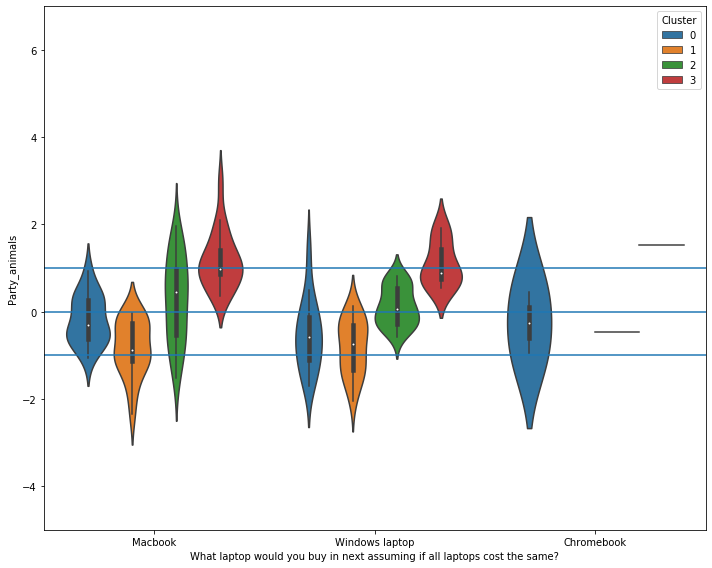

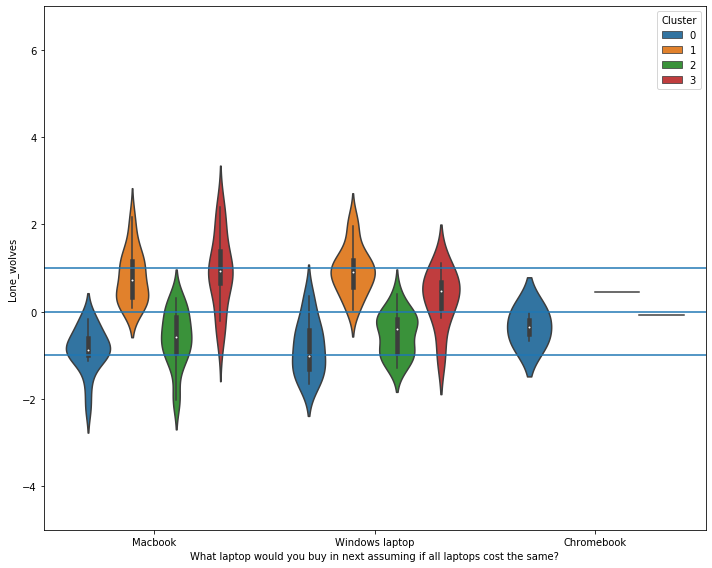

In [51]:
## NEXT LAPTOP BRAND vs CLUSTERS

# Couch Potato
fig,ax = plt.subplots(figsize = (10,8))
graph=sns.violinplot(x='What laptop would you buy in next assuming if all laptops cost the same?',
               y= final_df.iloc[:,9],
               hue=final_df.iloc[:,8],
               data = final_df)

graph.axhline(0)
graph.axhline(1)
graph.axhline(-2)
plt.ylim(-5,7)                   
plt.tight_layout()
plt.show

# Party Animal
fig,ax = plt.subplots(figsize = (10,8))
graph=sns.violinplot(x='What laptop would you buy in next assuming if all laptops cost the same?',
               y= final_df.iloc[:,10],
               hue=final_df.iloc[:,8],
               data = final_df)

graph.axhline(0)
graph.axhline(1)
graph.axhline(-1)
plt.ylim(-5,7)                   
plt.tight_layout()
plt.show


# Lone wolf
fig,ax = plt.subplots(figsize = (10,8))
graph=sns.violinplot(x='What laptop would you buy in next assuming if all laptops cost the same?',
               y= final_df.iloc[:,11],
               hue=final_df.iloc[:,8],
               data = final_df)

graph.axhline(0)
graph.axhline(1)
graph.axhline(-1)
plt.ylim(-5,7)                   
plt.tight_layout()
plt.show

***
<br>
<h3>Part VI: Key Insights and Recommendations</h3><br>
To further improve customer segmentation and targeting efforts, customer clusters have been
identified (using principal component analysis) based on different characteristic traits in relation to
buying behavior. Three major takeaways as well as actionable recommendations to target the identified
customer clusters are formulated below.

<strong>Loud, outgoing people like simplicity and design</strong>

Customers fall into two major categories. Outspoken, active and social individuals who tend to express
comparably less concern for others (58 customers) in comparison to more introverted individuals who
tend to be more concerned in emotions of others. Most customers that expressed willingness to buy an
Apple MacBook as their next computer fall into the first category. This aligns with Nevid (2014), showing
that Openness, which is defined by concern for others, aligns with risk aversity, and less of a focus on
style. Apple products are usually associated with style and expression of creativity and individualism.

&nbsp;













<strong>Lone Wolfs like MacBooks, too </strong>

Independent, introverted individuals prefer reliability, which is a feature represented by Apple
computers. Introverted individuals, whose characteristics would be expected to fall into the Microsoft
section, surprisingly express an aptitude towards Apple products. This aligns with their desire for
reliability and ease of use, which is generally a characteristic associated with the Apple brand.

&nbsp;








<strong>Recommendations</strong>

Target introvert individuals, which expect ease of use.


Given the third insight, Lone Wolfs are a surprising group to be associated with the Apple brand.
Following Nevid, they are usually cost averse, which does not align with the high costs associated with a
Mac. However, given the structure of the survey, people who appreciate reliability and easy of use as
demonstrated by the Lone Wolf characteristic, would appreciate the opportunity to by an Apple product,
given a new pricing strategy.
On the other hand, the expressionist and individualistic characteristic of the Party Animals which are the
majority of Apple current customers represented in the survey, buys Apple products to establish
uniqueness – a cost effective strategy to capture Lone Wolfs is therefore not an option.
As a mix of both, a marketing strategy focused on the reliability of the product, the easy of use and a way
to enable Lone Wolfs to realize the functional benefits of the products is suitable. Following Rivera
(2019), and informational ad campaign is the right approach for this cluster.

<h3> References </h3>
    
Hajnik, Z. (2014). Big Five Personality Traits in Marketing: A Literature Review. University of Vienna, 1-37.

Hirsh, J. B., Kang, K. S., & Bodenhausen, V. G. (2012). Personalized Persuasion: Tailoring Persuasive
Appeals to Recipients' Personality Traits. Psychological Science, 1-4.

Myers, S. D., Sen, S., & Alexandrov, A. (2010). The Moderating effect of Personality Traits on Attitudes
toward Advertisements: A contigency framework. Management & Marketing Challenges for
Knowledge Society, 5, 2-20.

Nevid, J. S., & Pastva, A. (2014). "I'm a Mac" versus "I'm a PC": Personality Differences between Mac and
PC Users in a College sample. Psychology and Marketing, 31(1), 31-37.

Rivera, C. (2019, 06 05). Helixa.ai. Retrieved 02 19, 2020, from Marketing With Pesonality:
https://www.helixa.ai/blog/marketing-with-personality